# insurance cahrge prediction

## Importing the Libararies

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

## Loading dataset 

In [2]:
df = pd.read_csv('insurance.csv')

### Let's do Some EDA(exploratory data analysis)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


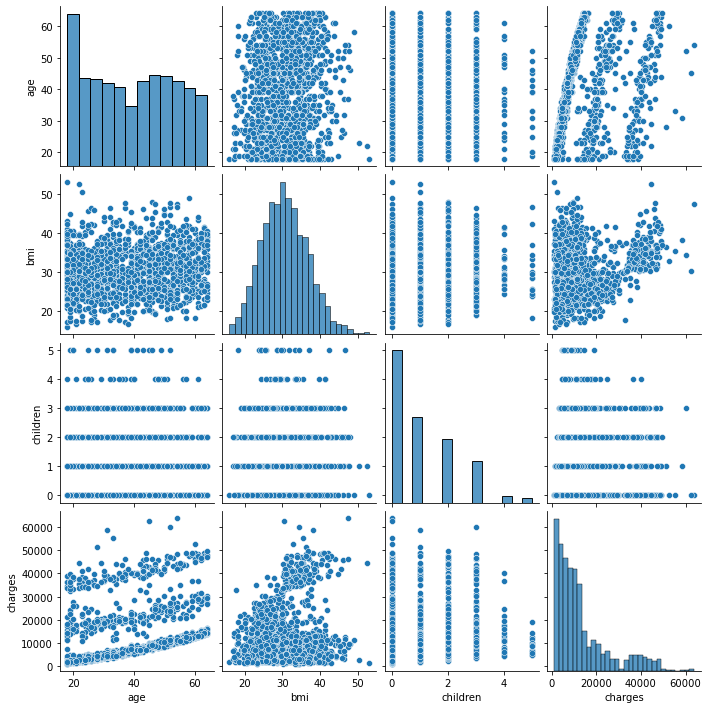

In [6]:
sns.pairplot(data=df,kind='scatter')

### Checking some realationship various features w.r.t Charges

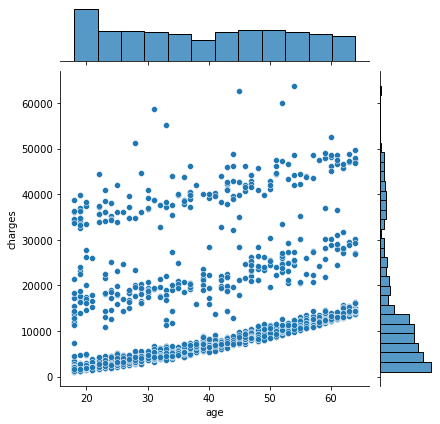

In [7]:
sns.jointplot(data=df, x='age',y='charges')

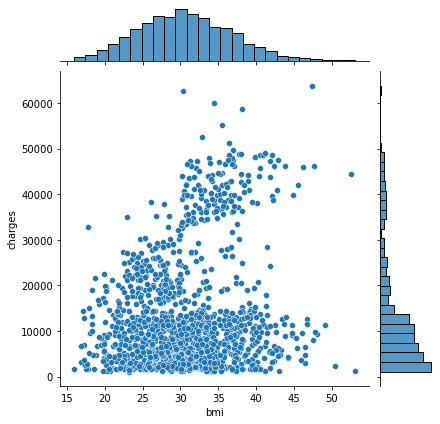

In [8]:
sns.jointplot(data=df, x='bmi',y='charges')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

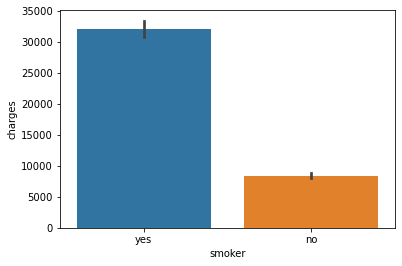

In [9]:
sns.barplot(x='smoker',y='charges',data=df)

### checking null values in each column 

In [10]:
df. isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## seprating dependent and Independent variables

In [11]:
X =df.iloc[:,:-1].values
y =df.iloc[:,-1].values

In [12]:
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [13]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

## Encoding categorical data 

### We have to encode smoker,region and sex column
#### As we have only two category in each column so we use LabelEncoder

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1]) #applying to sex column
X[:,4] = le.fit_transform(X[:,4]) #applying to smoker column
X[:,5] = le.fit_transform(X[:,5]) #applying to region column


### Now we can see our columns are converted into binary 0 and 1  

In [15]:
X

array([[19, 0, 27.9, 0, 1, 3],
       [18, 1, 33.77, 1, 0, 2],
       [28, 1, 33.0, 3, 0, 2],
       ...,
       [18, 0, 36.85, 0, 0, 2],
       [21, 0, 25.8, 0, 0, 3],
       [61, 0, 29.07, 0, 1, 1]], dtype=object)

## Splitting the dataset into Training and Test set 

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.2, random_state=101)

## Training with Linear Regression model

In [17]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
np.set_printoptions(precision=2)
y_pred =regressor.predict(X_test)
y_pred = y_pred.reshape(len(y_pred),1)

In [19]:
from sklearn.metrics import r2_score

print(r2_score(y_test,regressor.predict(X_test)))


0.7624676741521532


## We get only 76% accuracy with Linear Regression

## Let's try with Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [21]:
from sklearn.metrics import r2_score

print(r2_score(y_test,rf.predict(X_test)))

0.8434803382976931


## Yeah, Now we get 84% accuracy 